In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Online Retail.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


## Data preparation -----> Feature selection
- cell 1: from the data aggregate above, we can see some negative values in Quantity and UnitPrice, we have to get rid of / drop those.
- cell 2: create a calculated field ' Spend ' from quantity and unit price
- cell 3: create calculated field using max_date and min_date using the 'InvoiceDate' to know the time frame we are working with
- cell 4: create the RFM table by customer ID: 
     ---> R: last date the customer appeared 
     ---> F: total number of transactions by a customer 
     ---> M: total spend by the customer

In [6]:
df2 = df[(df['UnitPrice']>0) & (df['Quantity']>0)].reset_index(drop=True)
df2 = df2.dropna().reset_index(drop=True)
df2.describe()


,Quantity,InvoiceDate,UnitPrice,CustomerID
count,397884.000000,397884,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000
std,179.331775,NaN,22.097877,1713.141560


In [7]:
data = df2.copy()
data['Spend'] = data['Quantity'] * data['UnitPrice']

In [8]:
max_date = data['InvoiceDate'].max()
min_date = data['InvoiceDate'].min()

print('--minimum date--',min_date)
print('--maximum date--',max_date)

--minimum date-- 2010-12-01 08:26:00
--maximum date-- 2011-12-09 12:50:00


In [9]:
dfg = data.groupby(['CustomerID']).agg(Monetory = ('Spend',np.sum), 
                                Recency = ('InvoiceDate',np.max), 
                                Frequency = ('CustomerID',np.size)).reset_index()

In [10]:
# Finding the number of days since the customer made a purchase
dfg['day_since_lastpur'] = (max_date - dfg['Recency']).dt.days
dfg

,CustomerID,Monetory,Recency,Frequency,day_since_lastpur
0,12346.0,77183.60,2011-01-18 10:01:00,1,325
1,12347.0,4310.00,2011-12-07 15:52:00,182,1
2,12348.0,1797.24,2011-09-25 13:13:00,31,74
3,12349.0,1757.55,2011-11-21 09:51:00,73,18
4,12350.0,334.40,2011-02-02 16:01:00,17,309
...,...,...,...,...,...
4333,18280.0,180.60,2011-03-07 09:52:00,10,277
4334,18281.0,80.82,2011-06-12 10:53:00,7,180
4335,18282.0,178.05,2011-12-02 11:43:00,12,7
4336,18283.0,2094.88,2011-12-06 12:02:00,756,3


In [11]:
# delete duplicate col
# dfg.drop(columns='days_lastpur',axis=1,inplace=True)
dfg.describe()

,CustomerID,Monetory,Recency,Frequency,day_since_lastpur
count,4338.000000,4338.000000,4338,4338.000000,4338.000000
mean,15300.408022,2054.266460,2011-09-08 11:38:59.045643008,91.720609,91.536422
min,12346.000000,3.750000,2010-12-01 09:53:00,1.000000,0.000000
25%,13813.250000,307.415000,2011-07-20 19:18:00,17.000000,17.000000
50%,15299.500000,674.485000,2011-10-20 10:40:30,41.000000,50.000000
75%,16778.750000,1661.740000,2011-11-22 11:05:45,100.000000,141.000000
max,18287.000000,280206.020000,2011-12-09 12:50:00,7847.000000,373.000000
std,1721.808492,8989.230441,NaN,228.785094,100.014169


In [12]:
# Increment the 'day_since_lastpur' column by 1 to handle 0 error (from the min value descriptive data)
dfg['day_since_lastpur'] = dfg['day_since_lastpur']+1
dfg.describe()


,CustomerID,Monetory,Recency,Frequency,day_since_lastpur
count,4338.000000,4338.000000,4338,4338.000000,4338.000000
mean,15300.408022,2054.266460,2011-09-08 11:38:59.045643008,91.720609,92.536422
min,12346.000000,3.750000,2010-12-01 09:53:00,1.000000,1.000000
25%,13813.250000,307.415000,2011-07-20 19:18:00,17.000000,18.000000
50%,15299.500000,674.485000,2011-10-20 10:40:30,41.000000,51.000000
75%,16778.750000,1661.740000,2011-11-22 11:05:45,100.000000,142.000000
max,18287.000000,280206.020000,2011-12-09 12:50:00,7847.000000,374.000000
std,1721.808492,8989.230441,NaN,228.785094,100.014169


In [34]:
dfg.head(18) #data looks good already

,CustomerID,Monetory,Recency,Frequency,day_since_lastpur,day_since_lastpur_log,day_since_lastpur_sqrt,day_since_lastpur_boxcox,Frequency_log,Frequency_sqrt,Frequency_boxcox,Monetory_log,Monetory_sqrt,Monetory_boxcox
0,12346.0,77183.60,2011-01-18 10:01:00,1,326,5.789960,18.055470,10.039089,0.693147,1.000000,0.000000,11.253955,277.819366,7.280024
1,12347.0,4310.00,2011-12-07 15:52:00,182,2,1.098612,1.414214,0.737107,5.209486,13.490738,5.967408,8.368925,65.650590,6.011123
2,12348.0,1797.24,2011-09-25 13:13:00,31,75,4.330733,8.660254,6.460361,3.465736,5.567764,3.756089,7.494564,42.393867,5.561659
3,12349.0,1757.55,2011-11-21 09:51:00,73,19,2.995732,4.358899,3.855960,4.304065,8.544004,4.800962,7.472245,41.923144,5.549746
4,12350.0,334.40,2011-02-02 16:01:00,17,310,5.739793,17.606817,9.900640,2.890372,4.123106,3.050162,5.815324,18.286607,4.599025
5,12352.0,2506.04,2011-11-03 14:37:00,85,36,3.610918,6.000000,4.990343,4.454347,9.219544,4.991499,7.826858,50.060364,5.736392
6,12353.0,89.00,2011-05-19 17:47:00,4,204,5.323010,14.282857,8.795621,1.609438,2.000000,1.436939,4.499810,9.433981,3.739663
7,12354.0,1079.40,2011-04-21 13:11:00,58,232,5.451038,15.231546,9.126661,4.077537,7.615773,4.515810,6.985087,32.854223,5.284030
8,12355.0,459.40,2011-05-09 13:49:00,13,214,5.370638,14.628739,8.917922,2.639057,3.605551,2.741924,6.132096,21.433618,4.791380
9,12356.0,2811.43,2011-11-17 08:40:00,59,23,3.178054,4.795832,4.181848,4.094345,7.681146,4.536886,7.941804,53.022920,5.795703


## DATA TRANSFORMATION FOR EACH FEATURE


C:\Users\HP\AppData\Local\Temp\ipykernel_5424\2489766262.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfg['day_since_lastpur'], hist=False, kde=True,
C:\Users\HP\anaconda3\envs\k_means_ecom\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\HP\AppData\Local\Temp\ipykernel_5424\2489766262.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code

<Axes: xlabel='day_since_lastpur_boxcox', ylabel='Density'>

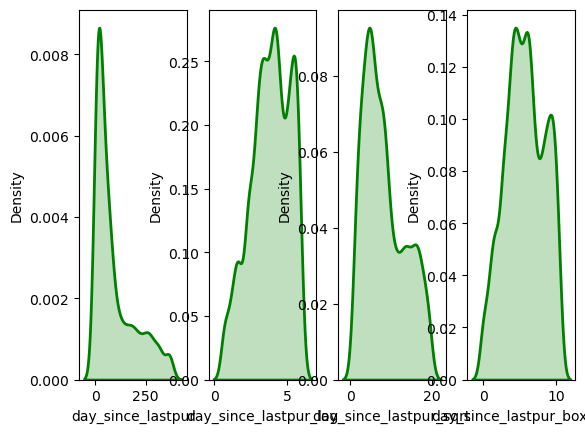

In [14]:
##### Transformations to get normal distribution for recency column
dfg['day_since_lastpur_log'] = np.log(dfg['day_since_lastpur'] + 1) # handle positive skew
dfg['day_since_lastpur_sqrt'] = np.sqrt(dfg['day_since_lastpur']) # handle negative skew
dfg['day_since_lastpur_boxcox'], _ = stats.boxcox(dfg['day_since_lastpur']) # stats.boxcox return 2 values

# Creating axes to draw plots for day_since_lastpur
fig, ax = plt.subplots(1, 4)

# Plotting the original data (non-normal)
sns.distplot(dfg['day_since_lastpur'], hist=False, kde=True,
             kde_kws={'shade': True, 'linewidth': 2},
             color="green", ax=ax[0])

# Plotting the log-transformed data
sns.distplot(dfg['day_since_lastpur_log'], hist=False, kde=True,
             kde_kws={'shade': True, 'linewidth': 2},
             color="green", ax=ax[1])

# Plotting the square root-transformed data
sns.distplot(dfg['day_since_lastpur_sqrt'], hist=False, kde=True,
             kde_kws={'shade': True, 'linewidth': 2},
             color="green", ax=ax[2])

# Plotting the Box-Cox transformed data
sns.distplot(dfg['day_since_lastpur_boxcox'], hist=False, kde=True,
             kde_kws={'shade': True, 'linewidth': 2},
             color="green", ax=ax[3])


C:\Users\HP\AppData\Local\Temp\ipykernel_5424\305640815.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfg['Frequency'], hist = False, kde = True,
C:\Users\HP\anaconda3\envs\k_means_ecom\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\HP\AppData\Local\Temp\ipykernel_5424\305640815.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to us

<Axes: xlabel='Frequency_boxcox', ylabel='Density'>

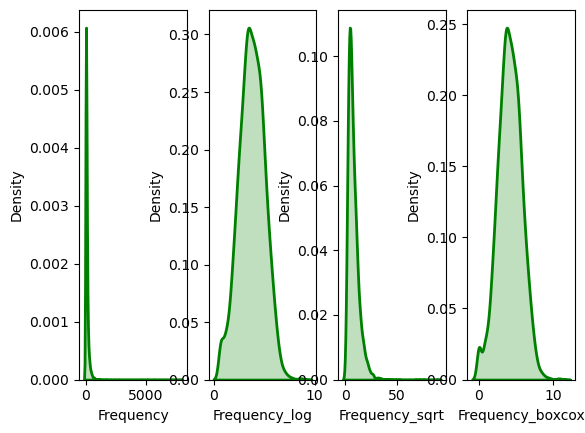

In [15]:
##### Transformations to get normal distribution for  
dfg['Frequency_log'] = np.log(dfg['Frequency']+1)
dfg['Frequency_sqrt'] = np.sqrt(dfg['Frequency'])
dfg['Frequency_boxcox'] = stats.boxcox(dfg['Frequency'])[0] # stats.boxcox return 2 values

# creating axes to draw plots for Recency
fig, ax = plt.subplots(1, 4)
  
# plotting the original data(non-normal) and 
sns.distplot(dfg['Frequency'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[0])

sns.distplot(dfg['Frequency_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[1])

sns.distplot(dfg['Frequency_sqrt'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[2])

sns.distplot(dfg['Frequency_boxcox'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[3])

C:\Users\HP\AppData\Local\Temp\ipykernel_5424\64781074.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfg['Monetory'], hist = False, kde = True,
C:\Users\HP\anaconda3\envs\k_means_ecom\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\HP\AppData\Local\Temp\ipykernel_5424\64781074.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use e

<Axes: xlabel='Monetory_boxcox', ylabel='Density'>

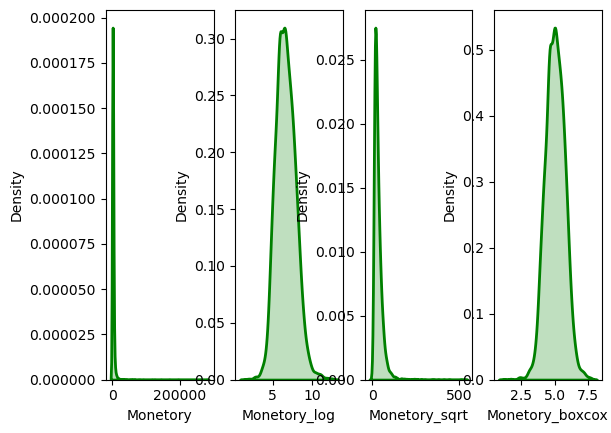

In [16]:
##### Transformations to get normal distribution
dfg['Monetory_log'] = np.log(dfg['Monetory']+1)
dfg['Monetory_sqrt'] = np.sqrt(dfg['Monetory'])
dfg['Monetory_boxcox'] = stats.boxcox(dfg['Monetory'])[0] # stats.boxcox return 2 values

# creating axes to draw plots for Recency
fig, ax = plt.subplots(1, 4)
  
# plotting the original data(non-normal) and 
sns.distplot(dfg['Monetory'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[0])

sns.distplot(dfg['Monetory_log'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[1])

sns.distplot(dfg['Monetory_sqrt'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[2])

sns.distplot(dfg['Monetory_boxcox'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[3])

In [18]:
# Calculate skewness for numerical columns
skewness = dfg[['day_since_lastpur_boxcox', 'Frequency_boxcox', 'Monetory_boxcox']].skew(axis=0)
print(skewness)


day_since_lastpur_boxcox   -0.070402
Frequency_boxcox            0.004135
Monetory_boxcox            -0.015831
dtype: float64


In [19]:
# Taking the normalized columns (those having skew closer to 0) for each RFM and creating and put into new Dataframe

customers = pd.DataFrame()
customers['Recency'] = dfg['day_since_lastpur_boxcox']
customers['Frequency'] = dfg['Frequency_boxcox']
customers['Monetory'] = dfg['Monetory_boxcox']
customers.head()

,Recency,Frequency,Monetory
0,10.039089,0.000000,7.280024
1,0.737107,5.967408,6.011123
2,6.460361,3.756089,5.561659
3,3.855960,4.800962,5.549746
4,9.900640,3.050162,4.599025


In [20]:
customers.describe()


,Recency,Frequency,Monetory
count,4338.000000,4338.000000,4338.000000
mean,5.678931,4.105681,5.023563
std,2.683698,1.596619,0.717761
min,0.000000,0.000000,1.251042
25%,3.765704,3.050162,4.547197
50%,5.664350,4.092125,5.017231
75%,7.902354,5.196619,5.519744
max,10.423264,11.395847,7.754963


In [21]:
# Normalize the data so that each variable has same mean and variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
new = sc.fit_transform(customers)
new

array([[ 1.62487001, -2.57178095,  3.14411433],
       [-1.84163571,  1.16617768,  1.37604893],
       [ 0.29121018, -0.21898305,  0.74977397],
       ...,
       [-1.18095643, -0.91134674, -1.14510853],
       [-1.5313799 ,  2.37588685,  0.86284663],
       [-0.1303989 ,  0.40277588,  0.76612172]])

In [22]:
customer = pd.DataFrame(new,columns=['Recency','Frequency','Monetory'])
customer.head()

,Recency,Frequency,Monetory
0,1.624870,-2.571781,3.144114
1,-1.841636,1.166178,1.376049
2,0.291210,-0.218983,0.749774
3,-0.679354,0.435521,0.733175
4,1.573275,-0.661173,-0.591544


In [23]:
customer['Customer'] = dfg['CustomerID']
customer = customer[['Customer','Recency','Frequency','Monetory']]
customer.head()

,Customer,Recency,Frequency,Monetory
0,12346.0,1.624870,-2.571781,3.144114
1,12347.0,-1.841636,1.166178,1.376049
2,12348.0,0.291210,-0.218983,0.749774
3,12349.0,-0.679354,0.435521,0.733175
4,12350.0,1.573275,-0.661173,-0.591544


C:\Users\HP\AppData\Local\Temp\ipykernel_5424\2914710030.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(customer['Recency'], hist = False, kde = True,
C:\Users\HP\anaconda3\envs\k_means_ecom\lib\site-packages\seaborn\distributions.py:2511: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)
C:\Users\HP\AppData\Local\Temp\ipykernel_5424\2914710030.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to

<Axes: xlabel='Monetory', ylabel='Density'>

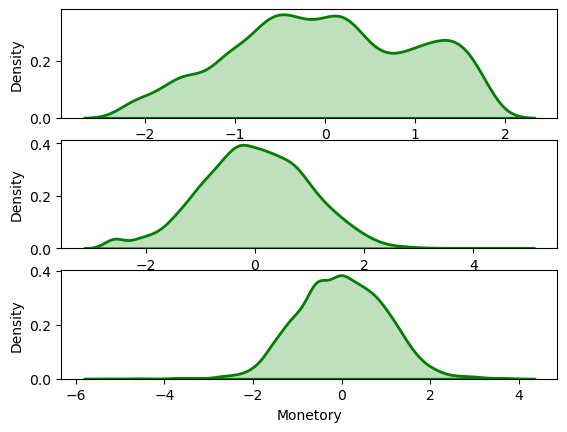

In [24]:
## Plotting the distribution of the features
fig, ax = plt.subplots(3, 1)
  
# plotting the original data(non-normal) and 
sns.distplot(customer['Recency'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[0])

sns.distplot(customer['Frequency'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[1])

sns.distplot(customer['Monetory'], hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            color ="green", ax = ax[2])

## Model building

In [25]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sse = {}
# Fit the KMeans model using the normalized features (excluding CustomerID)

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42).fit(customer.iloc[:,1:].values)
    

# Calculate and store the sum of squared distances (inertia) for the current number of clusters

    sse[i] = kmeans.inertia_

<Axes: >

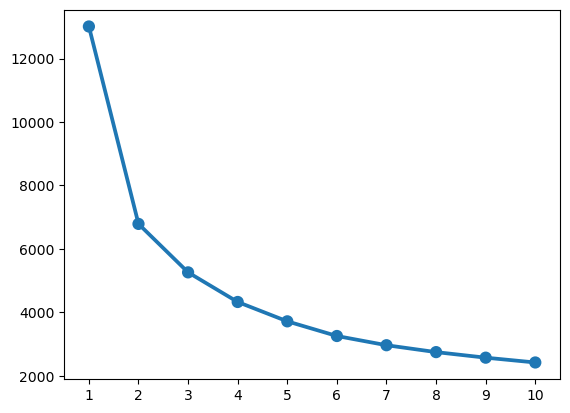

In [26]:
#Plotting number of cluster with sse
import seaborn as sns
sns.pointplot(x=list(sse.keys()),y=list(sse.values()))

In [27]:
# Silhoutte scoring (used for cluster definition)
kmeans = KMeans(n_clusters=3,random_state=42)
kmeans.fit(customer.iloc[:,1:].values)
sse[i] = kmeans.inertia_

cluster_labels = kmeans.labels_

silhouette_score(customer.iloc[:,1:].values, cluster_labels)

C:\Users\HP\anaconda3\envs\k_means_ecom\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.29867266548919047

In the context of silhouette scores:

A higher silhouette score (closer to 1) suggests that the clusters are well apart from each other and clearly distinguished.
A score near 0 indicates overlapping clusters.
A score closer to -1 implies that points have been assigned to the wrong clusters.

#### A silhouette score of around 0.29 suggests moderate separation and some overlap between clusters.

## Cluster definitions
### 0 - risk of leaving - low freq, low monetory, but visited the site
### 1 - churned - low freq, low monetory, not recent
### 2 - best customer - high freq, high monetory, recent

In [28]:
# Selecting ideal cluster number as 3
model = KMeans(n_clusters=3,random_state=42)
model.fit(customer.iloc[:,1:].values)
model.labels_.shape

C:\Users\HP\anaconda3\envs\k_means_ecom\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(4338,)

In [29]:
# assigning a cluster label (0, 1, or 2 ) to each customer
customer['Cluster'] = model.labels_
customer.groupby(['Cluster']).agg({'Recency':'mean',
                                  'Frequency':'mean',
                                  'Monetory':['mean','count']})

Recency Frequency  Monetory      
             mean      mean      mean count
Cluster                                    
0       -0.075659 -0.002943 -0.001480  1805
1       -0.941516  1.112188  1.104648  1191
2        0.937339 -0.983088 -0.978364  1342

In [30]:
customer.head()

,Customer,Recency,Frequency,Monetory,Cluster
0,12346.0,1.624870,-2.571781,3.144114,0
1,12347.0,-1.841636,1.166178,1.376049,1
2,12348.0,0.291210,-0.218983,0.749774,0
3,12349.0,-0.679354,0.435521,0.733175,1
4,12350.0,1.573275,-0.661173,-0.591544,2


In [31]:
#Creating snake plot to analyse clusters
dl = pd.melt(customer,
       id_vars=['Customer','Cluster'],
       value_vars=['Recency','Frequency','Monetory']).sort_values('Customer').reset_index(drop=True)
dl.head(10)

,Customer,Cluster,variable,value
0,12346.0,0,Recency,1.624870
1,12346.0,0,Frequency,-2.571781
2,12346.0,0,Monetory,3.144114
3,12347.0,1,Recency,-1.841636
4,12347.0,1,Frequency,1.166178
5,12347.0,1,Monetory,1.376049
6,12348.0,0,Recency,0.291210
7,12348.0,0,Frequency,-0.218983
8,12348.0,0,Monetory,0.749774
9,12349.0,1,Recency,-0.679354


<Axes: xlabel='variable', ylabel='value'>

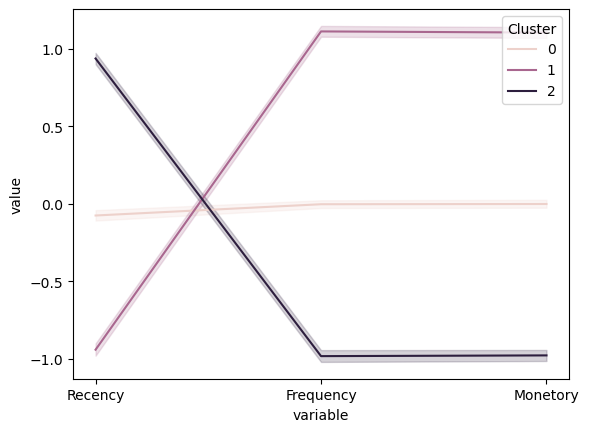

In [32]:
sns.lineplot(data= dl,x='variable',y='value',hue='Cluster')

In [33]:
import pickle

# Assuming your model is named 'model'
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)


In [43]:
cluster_summary = customer.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetory': 'mean',
    'Customer': 'count'
}).reset_index()
print(cluster_summary)

   Cluster   Recency  Frequency  Monetory  Customer
0        0 -0.075659  -0.002943 -0.001480      1805
1        1 -0.941516   1.112188  1.104648      1191
2        2  0.937339  -0.983088 -0.978364      1342


In [44]:
customer.to_csv('customer_data.csv', index=False)
